## YData's Synthetic Report Generation 

When synthesizing, we need to understand how good is the quality of the generated data. YData's proprietary library come in handy with the Synthetic Data Report. 
Based on the different aspects of the data, we run different metrics and visualizations to see how good the generated data is. In this demo we are going to showcase how to generate our report in the notebooks.

In [6]:
from pandas import read_csv, DataFrame
original_data = read_csv('original_data.csv').drop('customerID',axis=1)
synth_data = read_csv('generated_data.csv')

Before creating the synth data quality report we need to deal with the categoricals variables. 

In [7]:
# function to preprocess the data 
from numpy import nan
def preprocess_data(data):
    data["TotalCharges"] = data["TotalCharges"].replace(" ", 0).astype("float32")
    binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
    empty_cols = ["gender","SeniorCitizen","Partner","Dependents","tenure","PhoneService",
        "MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
        "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod",
        "MonthlyCharges","TotalCharges","Churn",]

    for i in empty_cols:
        data[i] = data[i].replace(" ", nan)
    for i in binary_cols:
        data[i] = data[i].replace({"Yes": 1, "No": 0})

    # Encoding column 'gender'
    data["gender"] = data["gender"].replace({"Male": 1, "Female": 0})
    

In [8]:
# Preprocess the data for the Report  
from sklearn.preprocessing import OrdinalEncoder
from numpy import concatenate

data_processed = preprocess_data(original_data)
synth_data_processed = preprocess_data(synth_data)

# Select columns
cat_cols=["PaymentMethod","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
        "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract"]


columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PaperlessBilling','MonthlyCharges', 'TotalCharges', 'Churn',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaymentMethod']

# Encode categorical 
encoder = OrdinalEncoder()
cat_original = encoder.fit_transform(original_data[cat_cols])
cat_synth = encoder.fit_transform(synth_data[cat_cols])

# Concatenate the results
data_processed = DataFrame(concatenate([original_data.drop(cat_cols,axis=1),cat_original],axis=1),columns=columns)
synth_data_processed = DataFrame(concatenate([synth_data.drop(cat_cols,axis=1),cat_synth],axis=1),columns=columns)


Results could be biased because no target was provided. Chosen target: InternetService.


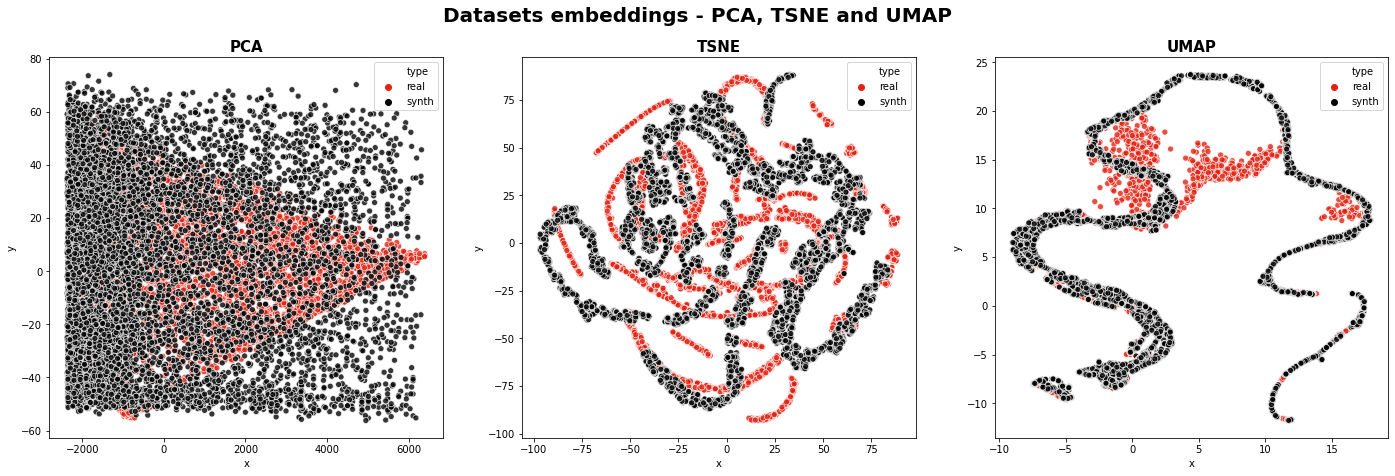

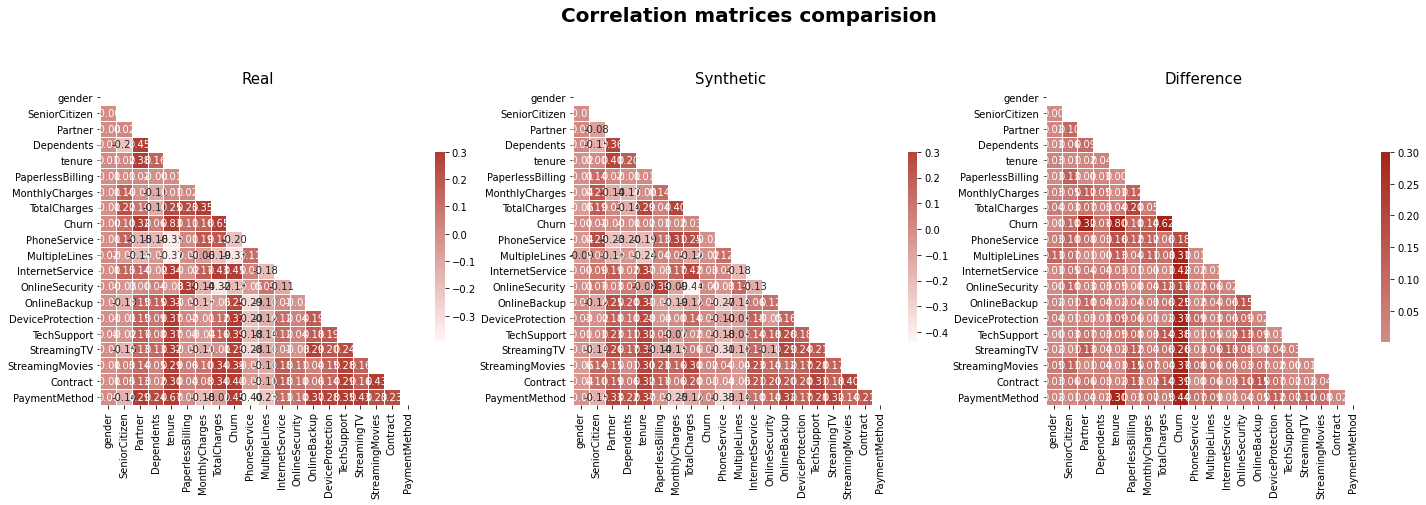

# Original Events: 7K
# New Events Generated: 8K
# Missing Values Detected: 0
Utility Score: 0.94
Privacy Score: 5.4%
Fidelity Score: 0.93


{'info_metrics': [{'label': '# Original Events', 'value': '7K'},
  {'label': '# New Events Generated', 'value': '8K'},
  {'label': '# Missing Values Detected', 'value': 0}],
 'featured': [{'label': 'Utility Score', 'value': '0.94'},
  {'label': 'Privacy Score', 'value': '5.4%'},
  {'label': 'Fidelity Score', 'value': '0.93'}],
 'privacy': {'title': 'Privacy Metrics',
  'text': 'Privacy measures quantify the degree of exposure of real samples carried within the synthetically generated data.',
  'blocks': [{'value': 0.0, 'label': 'Exact Matches'},
   {'value': 0.95, 'label': 'Synth Classifier'},
   {'value': 8.16, 'label': 'Privacy at risk'},
   {'value': 0.61, 'label': 'Hamming Privacy'},
   {'value': 0.0, 'label': 'Neighbours Privacy'}],
  'metrics_description': '<br><p>The <b>EXACT MATCHES</b> metric provide the ratio of records from the real data that can also be found in the synthetic dataset. The value is expected to be close to 0. The lower the ratio the higher privacy is expected

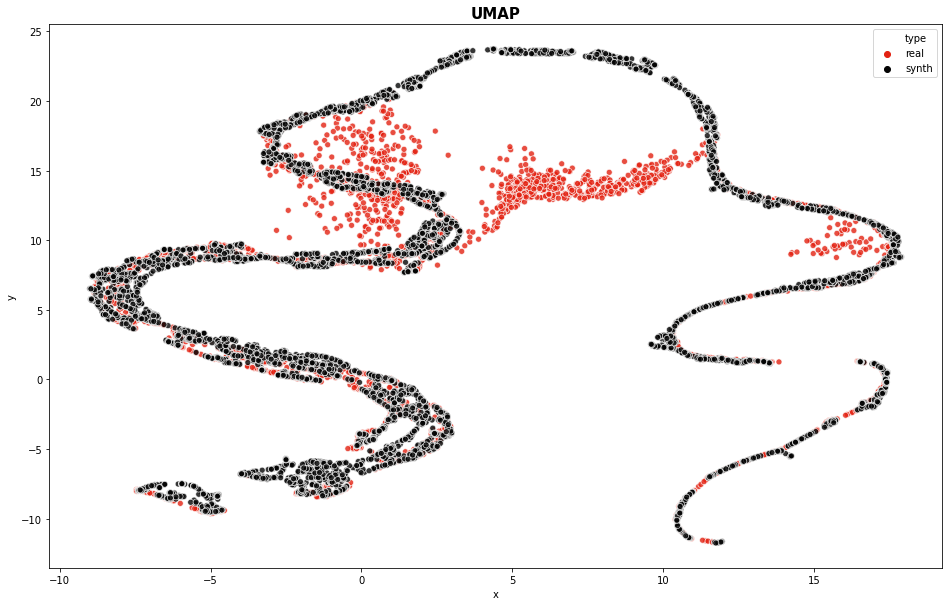

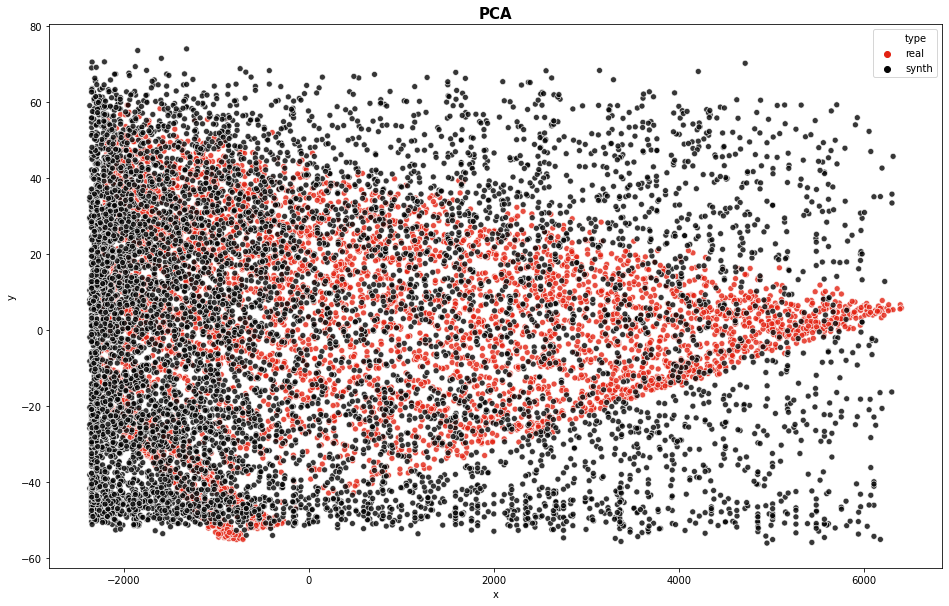

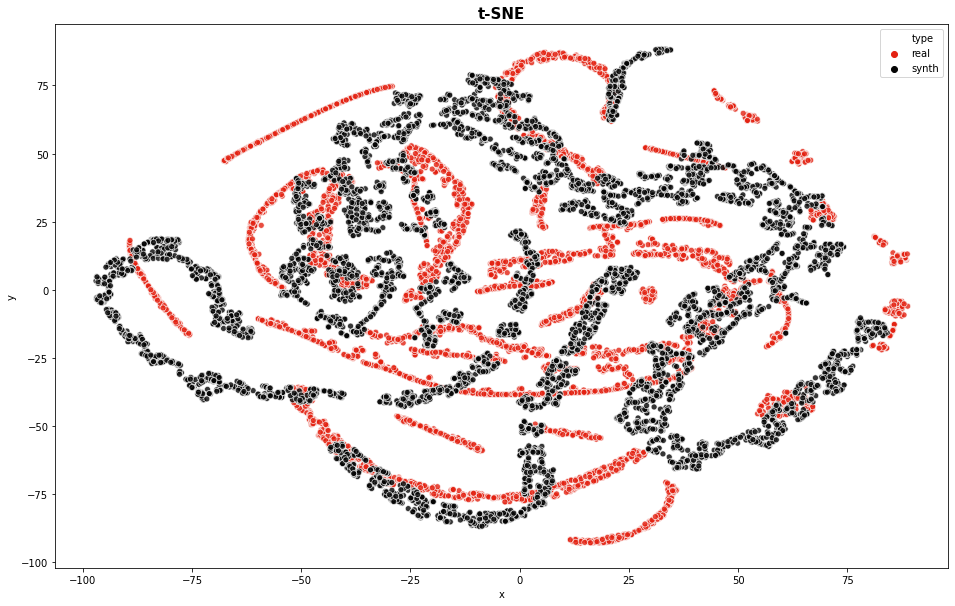

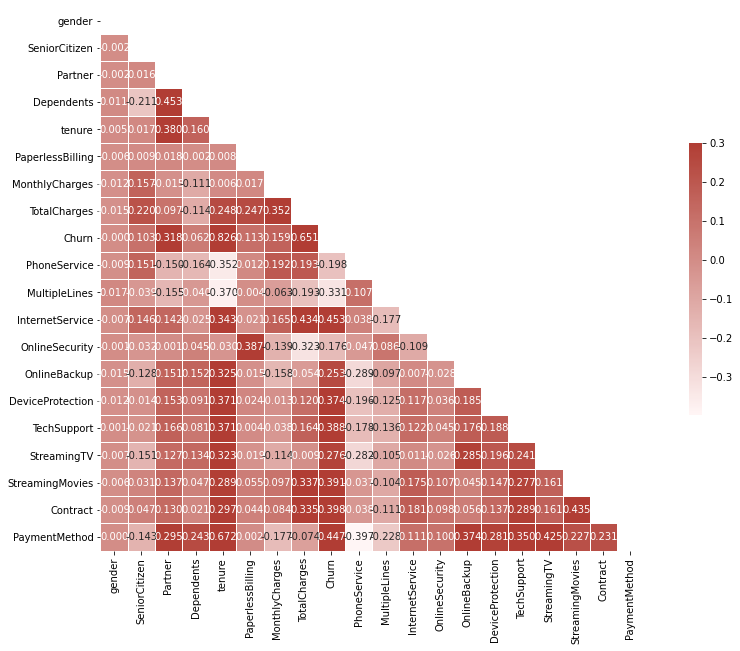

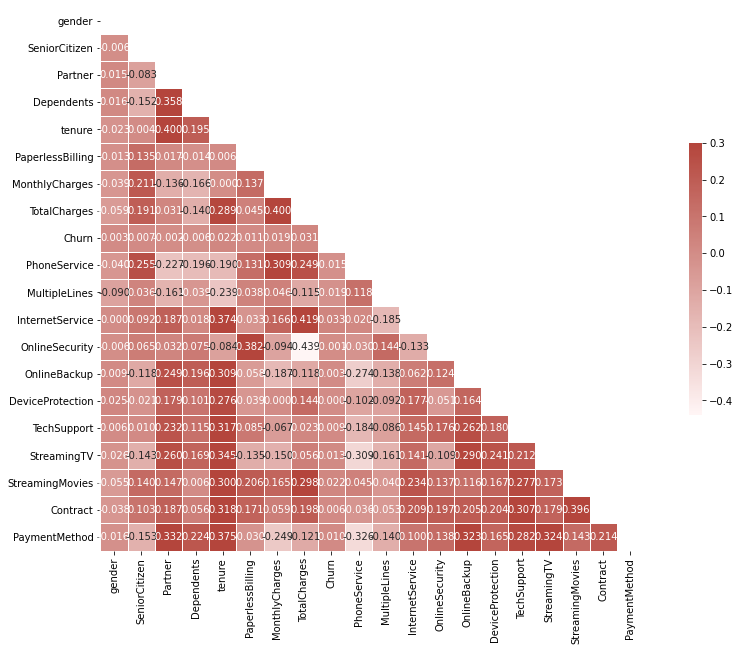

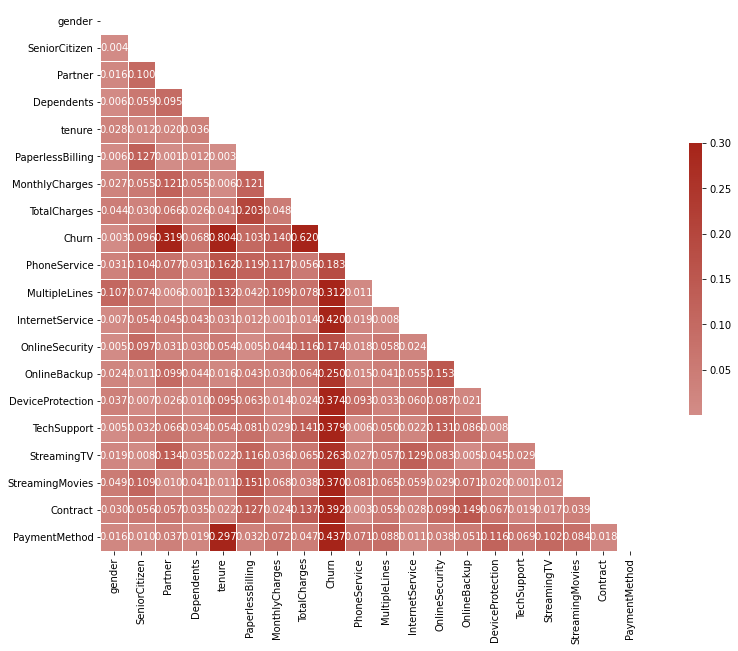

In [9]:
from ydata.report.syntheticdata_profile import SyntheticDataProfile
report = SyntheticDataProfile()
report.generate_report(data_processed,synth_data_processed, pdf=True, output_path='./report_telco.pdf')

### Creation of the artifact 

This time instead of a table, we are going to output the YData's Synthetic Data Report in order to show it in the platform

In [5]:
import base64
import json 

with open("./report_telco.pdf", "rb") as pdf_file:
    encoded_string = base64.b64encode(pdf_file.read())

text = '''
<html>
    <body>
        <div>
            <object type="application/pdf" data="data:application/pdf;base64,''' + encoded_string.decode('utf-8') + '''" style="width:100%; height:600px;" frameborder="0">
        </div>
    </body>
</html>
'''

metadata = {
    "outputs": [
        {
            "type": "web-app",
            "storage": "inline",
            "source": text
        }
    ]
}

with open('mlpipeline-ui-metadata.json', 'w') as f:
    json.dump(metadata, f)
